In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from PIL import Image


In [16]:
print(os.listdir("./train"))


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [17]:
SIZE = 224  # Resize images

# Capture training data and labels into respective lists
train_images = []
train_labels = []

for directory_path in glob.glob("./train/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)


./train\daisy\100080576_f52e8ee070_n.jpg
./train\daisy\10140303196_b88d3d6cec.jpg
./train\daisy\10172379554_b296050f82_n.jpg
./train\daisy\10172567486_2748826a8b.jpg
./train\daisy\10172636503_21bededa75_n.jpg
./train\daisy\102841525_bd6628ae3c.jpg
./train\daisy\1031799732_e7f4008c03.jpg
./train\daisy\10391248763_1d16681106_n.jpg
./train\daisy\10437754174_22ec990b77_m.jpg
./train\daisy\10437770546_8bb6f7bdd3_m.jpg
./train\daisy\10437929963_bc13eebe0c.jpg
./train\daisy\10466290366_cc72e33532.jpg
./train\daisy\10466558316_a7198b87e2.jpg
./train\daisy\10555749515_13a12a026e.jpg
./train\daisy\10555815624_dc211569b0.jpg
./train\daisy\10555826524_423eb8bf71_n.jpg
./train\daisy\10559679065_50d2b16f6d.jpg
./train\daisy\105806915_a9c13e2106_n.jpg
./train\daisy\10712722853_5632165b04.jpg
./train\daisy\107592979_aaa9cdfe78_m.jpg
./train\daisy\10770585085_4742b9dac3_n.jpg
./train\daisy\10841136265_af473efc60.jpg
./train\daisy\10993710036_2033222c91.jpg
./train\daisy\10993818044_4c19b86c82.jpg
./tra

In [18]:
# Convert lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [20]:
test_images = []
test_labels = []
for directory_path in glob.glob("./test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)


./test\daisy\134372449_0f7166d96c_n.jpg
./test\daisy\14698531521_0c2f0c6539.jpg
./test\daisy\18684594849_7dd3634f5e_n.jpg
./test\daisy\2019064575_7656b9340f_m.jpg
./test\daisy\21652746_cc379e0eea_m.jpg
./test\daisy\2649404904_b7a91991bb_n.jpg
./test\daisy\3415180846_d7b5cced14_m.jpg
./test\daisy\4144275653_7c02d47d9b.jpg
./test\daisy\437859108_173fb33c98.jpg
./test\daisy\515112668_a49c69455a.jpg
./test\daisy\54377391_15648e8d18.jpg
./test\daisy\5673728_71b8cb57eb.jpg
./test\daisy\5794835_d15905c7c8_n.jpg
./test\daisy\6208851904_9d916ebb32_n.jpg
./test\daisy\7416083788_fcb4c4f27e_n.jpg
./test\daisy\8645839873_0151fb92bf_n.jpg
./test\dandelion\10486992895_20b344ce2d_n.jpg
./test\dandelion\13807932364_673b7f1c1c_n.jpg
./test\dandelion\14368895004_c486a29c1e_n.jpg
./test\dandelion\17280886635_e384d91300_n.jpg
./test\dandelion\2476098674_e6f39536f5_n.jpg
./test\dandelion\3419172904_7708414ae9_n.jpg
./test\dandelion\3554435478_1a7ab743e9_n.jpg
./test\dandelion\4550784336_584d7a65de_m.jpg
./t

In [21]:
# Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [22]:
# Encode labels from text to integers.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

# Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = (
    train_images,
    train_labels_encoded,
    test_images,
    test_labels_encoded,
)

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [24]:
# Load model without classifier/fully connected layers
VGG_model = VGG16(weights="imagenet", include_top=False, input_shape=(SIZE, SIZE, 3))
# Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
    layer.trainable = False

VGG_model.summary()  # Trainable parameters will be 0

# Now, let us use features from convolutional network for RF
feature_extractor = VGG_model.predict(x_train)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features  # This is our X input to RF



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [62]:
# XGBOOST
import xgboost as xgb

xgbm = xgb.XGBClassifier()
xgbm.fit(X_for_training, y_train)  # For sklearn no one hot encoding



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [63]:
# lightGBM
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_for_training, y_train)


LGBMClassifier()

In [43]:
# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)


In [64]:
# Now predict using the trained RF model.
# Inverse le transform to get original label back.
XGPrediction = xgbm.predict(X_test_features)
XGPrediction = le.inverse_transform(XGPrediction)
LGPrediction = lgbm.predict(X_test_features)
LGPrediction = le.inverse_transform(LGPrediction)


In [73]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, XGPrediction))
print(classification_report(test_labels, LGPrediction))


              precision    recall  f1-score   support

       daisy       0.81      0.81      0.81        16
   dandelion       0.89      1.00      0.94        16
       roses       0.91      0.62      0.74        16
  sunflowers       0.70      0.88      0.78        16
      tulips       0.73      0.69      0.71        16

    accuracy                           0.80        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.81      0.80      0.80        80

              precision    recall  f1-score   support

       daisy       0.72      0.81      0.76        16
   dandelion       0.94      1.00      0.97        16
       roses       0.77      0.62      0.69        16
  sunflowers       0.68      0.81      0.74        16
      tulips       0.77      0.62      0.69        16

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.77        80



Accuracy XGB =  0.8
Accuracy LGB =  0.775
xg: 
[[13  0  0  2  1]
 [ 0 16  0  0  0]
 [ 1  1 10  1  3]
 [ 2  0  0 14  0]
 [ 0  1  1  3 11]]
lg: 
[[13  0  1  2  0]
 [ 0 16  0  0  0]
 [ 2  1 10  0  3]
 [ 3  0  0 13  0]
 [ 0  0  2  4 10]]
The prediction [XGB] for this image is:  ['roses']
The prediction [LGB] for this image is:  ['roses']
The actual label for this image is:  tulips


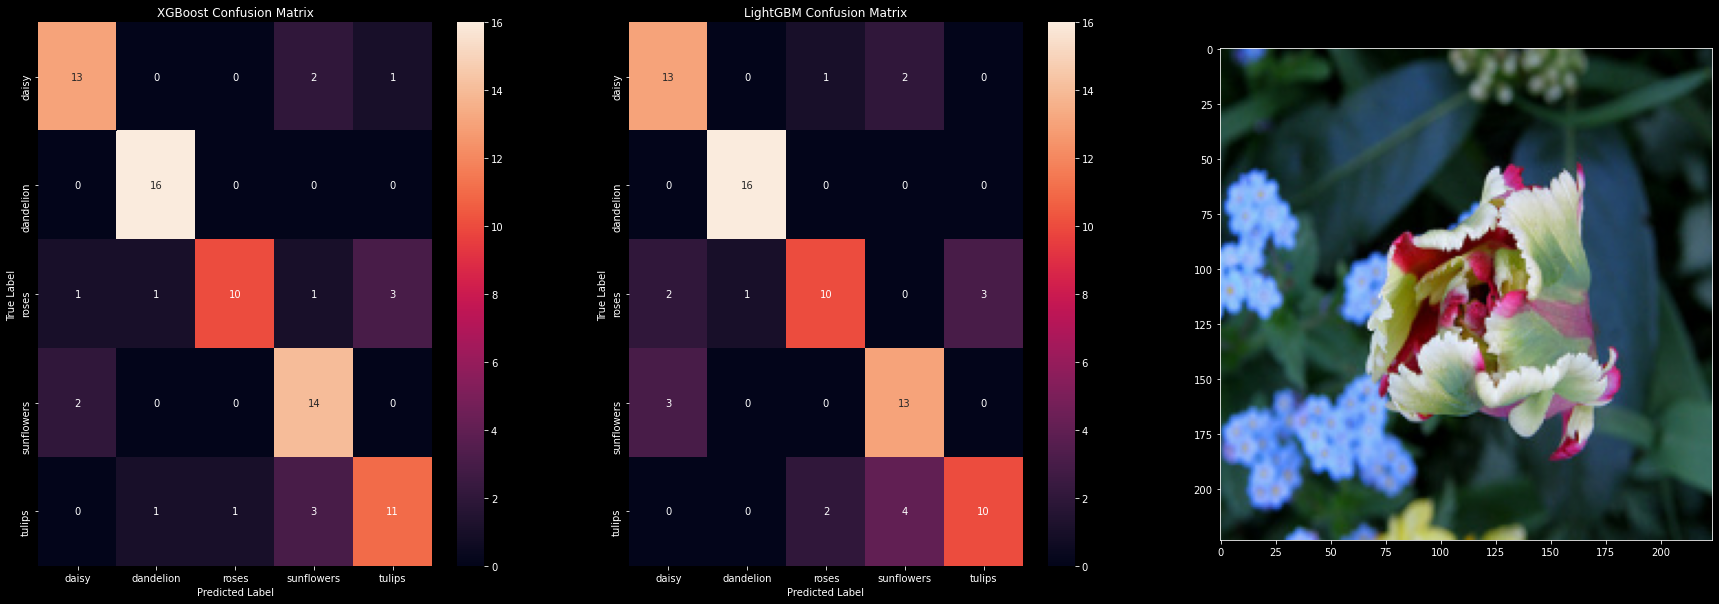

In [80]:
# Print overall accuracy
from sklearn import metrics

print("Accuracy XGB = ", metrics.accuracy_score(test_labels, XGPrediction))
print("Accuracy LGB = ", metrics.accuracy_score(test_labels, LGPrediction))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix


# Check results on a few select images
def print_image():
    xg_cm = confusion_matrix(test_labels, XGPrediction)
    print(f"xg: \n{xg_cm}")
    lg_cm = confusion_matrix(test_labels, LGPrediction)
    print(f"lg: \n{lg_cm}")
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))
    sns.heatmap(
        xg_cm,
        annot=True,
        ax=axes[0],
        xticklabels=np.unique(test_labels),
        yticklabels=np.unique(test_labels),
    ).set(
        title="XGBoost Confusion Matrix", xlabel="Predicted Label", ylabel="True Label",
    )
    sns.heatmap(
        lg_cm,
        annot=True,
        ax=axes[1],
        xticklabels=np.unique(test_labels),
        yticklabels=np.unique(test_labels),
    ).set(
        title="LightGBM Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
    )
    n = np.random.randint(0, x_test.shape[0])
    img = x_test[n]
    plt.imshow(img)
    input_img = np.expand_dims(
        img, axis=0
    )  # Expand dims so the input is (num images, x, y, c)
    input_img_feature = VGG_model.predict(input_img)
    input_img_features = input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_xgb = xgbm.predict(input_img_features)[0]
    prediction_xgb = le.inverse_transform(
        [prediction_xgb]
    )  # Reverse the label encoder to original name
    prediction_lgb = lgbm.predict(input_img_features)[0]
    prediction_lgb = le.inverse_transform(
        [prediction_lgb]
    )  # Reverse the label encoder to original name
    print("The prediction [XGB] for this image is: ", prediction_xgb)
    print("The prediction [LGB] for this image is: ", prediction_lgb)
    print("The actual label for this image is: ", test_labels[n])


print_image()


xg: 
[[13  0  0  2  1]
 [ 0 16  0  0  0]
 [ 1  1 10  1  3]
 [ 2  0  0 14  0]
 [ 0  1  1  3 11]]
lg: 
[[13  0  1  2  0]
 [ 0 16  0  0  0]
 [ 2  1 10  0  3]
 [ 3  0  0 13  0]
 [ 0  0  2  4 10]]
The prediction [XGB] for this image is:  ['dandelion']
The prediction [LGB] for this image is:  ['dandelion']
The actual label for this image is:  dandelion


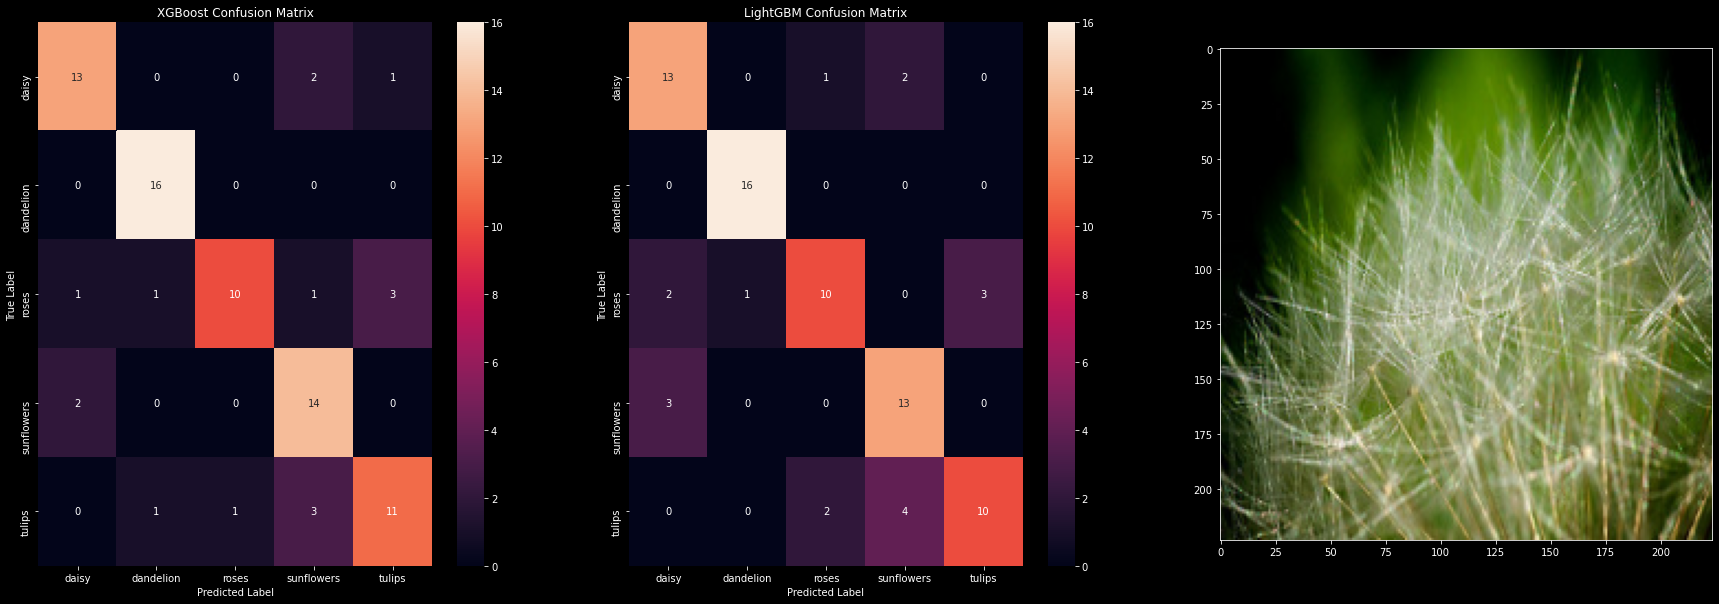

In [81]:
print_image()


In [ ]:
# Hyperparameters Tuning
from sklearn.model_selection import RandomizedSearchCV

xgb_params = {
    "max_depth": [3, 5, 6, 10, 15, 20],
    "subsample": np.arange(0.5, 1.0, 0.1),
    "colsample_bytree": np.arange(0.4, 1.0, 0.1),
}

xgbc = xgb.XGBClassifier()
clf = RandomizedSearchCV(
    estimator=xgbc,
    param_distributions=xgb_params,
    scoring="neg_mean_squared_error",
    verbose=1,
    cv=3,
)
clf.fit(X_for_training, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_) ** (1 / 2.0))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'subsample': 0.6, 'max_depth': 20, 'colsample_bytree': 0.6}
Lowest RMSE:  0.9920968920493087


In [61]:
clf = xgb.XGBClassifier(subsample=0.6, max_depth=20, colsample_bytree=0.6)
clf.fit(X_for_training, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.score()) ** (1 / 2.0))


KeyboardInterrupt: 

In [39]:
# Storing model
import pickle

s = pickle.dumps(clf)
pickle.dump(clf, open("xgb_flower_model_tuned.p", "wb"))


In [32]:
import lightgbm as lgb

# Hyperparameters Tuning
from sklearn.model_selection import RandomizedSearchCV

lgb_params = {
    "num_leaves": [31, 127],
    "reg_alpha": [0.1, 0.5],
    "min_data_in_leaf": [30, 50, 100, 300, 400],
}

lgbc = lgb.LGBMClassifier()
clf2 = RandomizedSearchCV(
    estimator=lgbc,
    param_distributions=lgb_params,
    scoring="neg_mean_squared_error",
    verbose=1,
    cv=3,
)

clf2.fit(X_for_training, y_train)
print("Best parameters:", clf2.best_params_)
print("Lowest RMSE: ", (-clf2.best_score_) ** (1 / 2.0))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will

In [34]:
import pickle

lgDump = pickle.dumps(clf2)
pickle.dump(clf2, open("lgb_flower_model_tuned.p", "wb"))
# clf3 = pickle.load(open("lgb_flower_model.p", "rb"))


In [ ]:
np.save("X_for_training.npy", X_for_training)



In [55]:
lg_clf = pickle.load(open("lgb_flower_model_tuned.p", "rb"))


In [56]:
xg_clf = pickle.load(open("xgb_flower_model_tuned.p", "rb"))


In [58]:
XGPrediction = xg_clf.predict(X_test_features)
XGPrediction = le.inverse_transform(XGPrediction)
LGPrediction = lg_clf.predict(X_test_features)
LGPrediction = le.inverse_transform(LGPrediction)
print("Accuracy XGB = ", metrics.accuracy_score(test_labels, XGPrediction))
print("Accuracy LGB = ", metrics.accuracy_score(test_labels, LGPrediction))
print(confusion_matrix(test_labels, XGPrediction))
print(confusion_matrix(test_labels, LGPrediction))


Accuracy XGB =  0.7625
Accuracy LGB =  0.75
[[14  1  0  0  1]
 [ 1 14  0  1  0]
 [ 2  0 11  1  2]
 [ 2  0  0 13  1]
 [ 0  0  1  6  9]]
[[13  1  0  1  1]
 [ 0 15  0  1  0]
 [ 0  1 10  1  4]
 [ 3  1  0 12  0]
 [ 0  0  1  5 10]]


In [ ]:
[[14  1  0  0  1]
 [ 1 14  0  1  0]
 [ 2  0 11  1  2]
 [ 2  0  0 13  1]
 [ 0  0  1  6  9]]